In [1]:
import json
import pandas as pd
import time
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import os

trait_name = 'attractive'
likert_data = pd.read_csv('./'+trait_name+'/likert_data.csv')

sub_num_dict = {}
sub_counter = 1
for sub_id in likert_data['subId']:
    if sub_id not in sub_num_dict:
        sub_num_dict[sub_id] = sub_counter
        sub_counter += 1

likert_data['subNum'] = likert_data['subId'].map(sub_num_dict)

img_num_dict = {}
img_counter = 0
for img_name in likert_data['imgName']:
    if img_name not in img_num_dict:
        img_num_dict[img_name] = img_counter
        img_counter += 1
        
likert_data['imgNum'] = likert_data['imgName'].map(img_num_dict)

likert_data = likert_data.sort_values(by=['subNum', 'imgNum'], ascending=True)
likert_data = likert_data[['subNum', 'imgNum', 'rating', 'rt', 'imgName', 'trial_index']]
likert_data['rating'] = likert_data['rating'].astype(np.int64)
likert_data.head()

,subNum,imgNum,rating,rt,imgName,trial_index
0,1,0,8,5913,054808.jpg,1
1,1,1,4,12492,100138.jpg,2
39,1,1,8,4365,100138.jpg,43
2,1,2,2,5218,144010.jpg,3
3,1,3,9,5540,059217.jpg,4


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


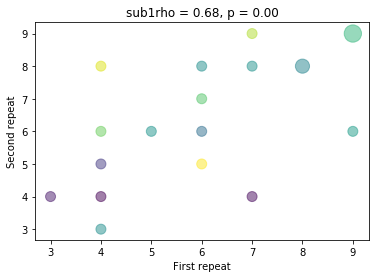

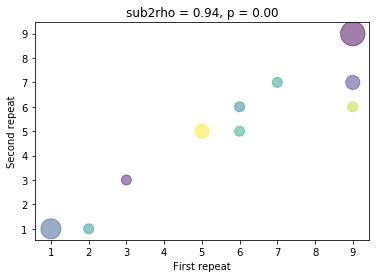

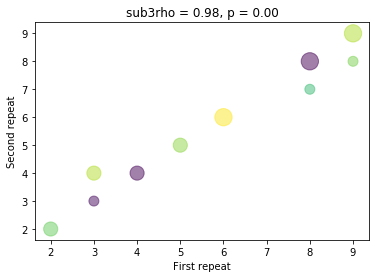

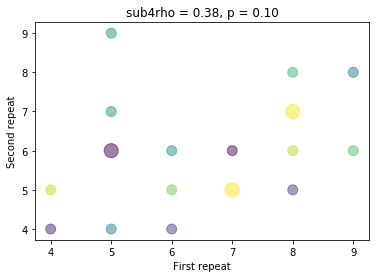

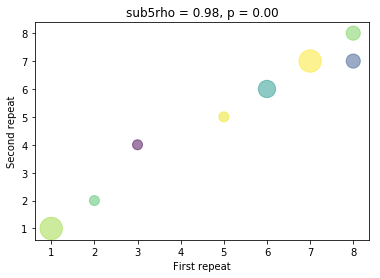

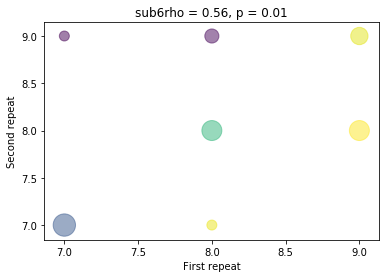

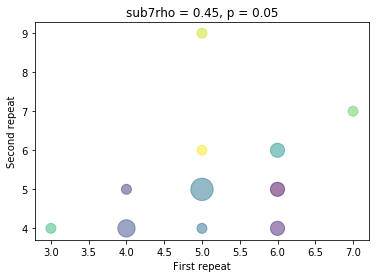

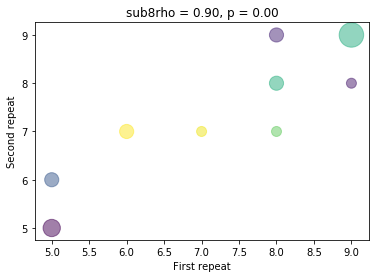

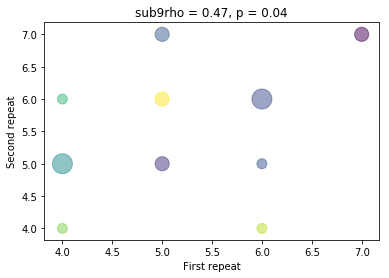

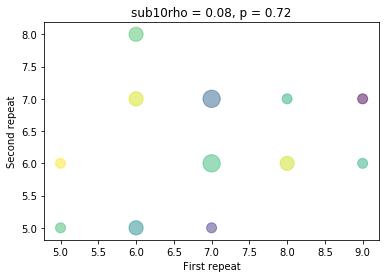

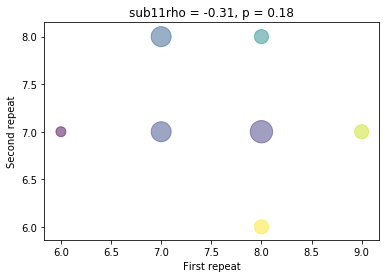

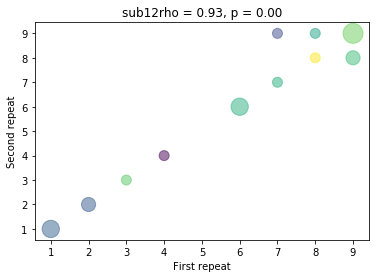

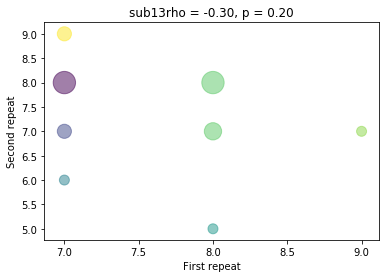

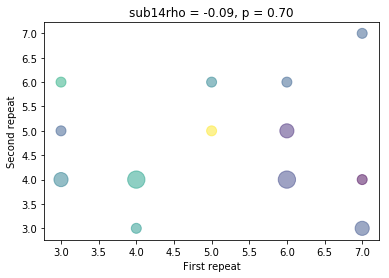

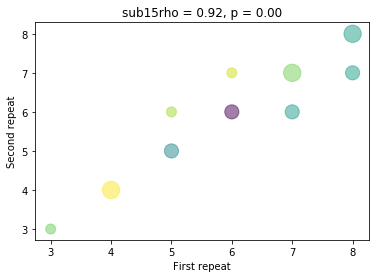

In [33]:
rho_lst = []
p_lst = []
for sub_num in range(1, 16):
    cur_sub_data = likert_data[likert_data['subNum']==sub_num]
    cur_sub_data['freq'] = cur_sub_data.groupby('imgNum')['imgNum'].transform('count')
    repeat_lst = cur_sub_data[cur_sub_data['freq']==2]
    p = repeat_lst.sort_values(by=['imgNum'])
    p1 = p[::2]
    p2 = p[1::2]
    
    first_half = p1['rating'].values
    second_half = p2['rating'].values
    rho, p = spearmanr(first_half, second_half)
    rho_lst.append(rho)
    p_lst.append(p)

    unique_coor = sorted(set(zip(first_half, second_half)))
    total_coor = list(zip(first_half, second_half))

    size = []

    for coor in unique_coor:
        size.append(total_coor.count(coor))

    x_unique_coor, y_unique_coor = zip(*unique_coor)

    colors = np.random.rand(len(x_unique_coor))

    plt.title('sub' + str(sub_num)+'rho = {:.2f}, p = {:.2f}'.format(rho, p))
    plt.xlabel('First repeat')
    plt.ylabel('Second repeat')
    plt.scatter(x_unique_coor, y_unique_coor, s=np.array(size)*100, alpha=0.5, c=colors)
    plt.show()
    # likert_data.sort_values(by=['subNum', 'trial_index', 'imgNum'], ascending=True)[0:100]

In [40]:

for i, (rho, p) in enumerate(zip(rho_lst, p_lst)):
    if p > 0.05:
        print i+1, rho, p

4 0.380995548034925 0.09744874612711438
10 0.08402116365887971 0.7247009149774775
11 -0.3117680139665195 0.18085315820357328
13 -0.2996718001663412 0.1992734122491267
14 -0.09042974664949961 0.7045746164083881


In [41]:
qualfied_sub_lst = []

for i, (rho, p) in enumerate(zip(rho_lst, p_lst)):
    if p < 0.05:
        qualfied_sub_lst.append(i+1)

In [42]:
qualfied_sub_lst

[1, 2, 3, 5, 6, 7, 8, 9, 12, 15]

In [43]:
likert_data.shape

(1500, 6)

In [46]:
keep_data = likert_data[likert_data['subNum'].isin(qualfied_sub_lst)]

In [47]:
keep_data.shape

(1000, 6)

In [49]:
rho_lst

[0.6778210116731518,
 0.9398872058172387,
 0.98268572106608,
 0.380995548034925,
 0.9751052541555882,
 0.5578659575552554,
 0.4516218203925764,
 0.9024417086348921,
 0.4705997421036336,
 0.08402116365887971,
 -0.3117680139665195,
 0.9275139216391283,
 -0.2996718001663412,
 -0.09042974664949961,
 0.9166768647127215]